# PCA on Images

In [76]:
# PCA

import numpy as np
import pandas as pd

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline

import cv2
import seaborn as sns

from sklearn.preprocessing import StandardScaler



In [77]:
# import npy files

X_train = np.load('x_train.npy')
X_test = np.load('x_test.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

In [78]:
(X_train.shape,y_train.shape)

((1280, 150, 150, 3), (1280,))

In [79]:
(X_test.shape,y_test.shape)

((320, 150, 150, 3), (320,))

In [80]:
img =X_train[10]
img.shape

(150, 150, 3)

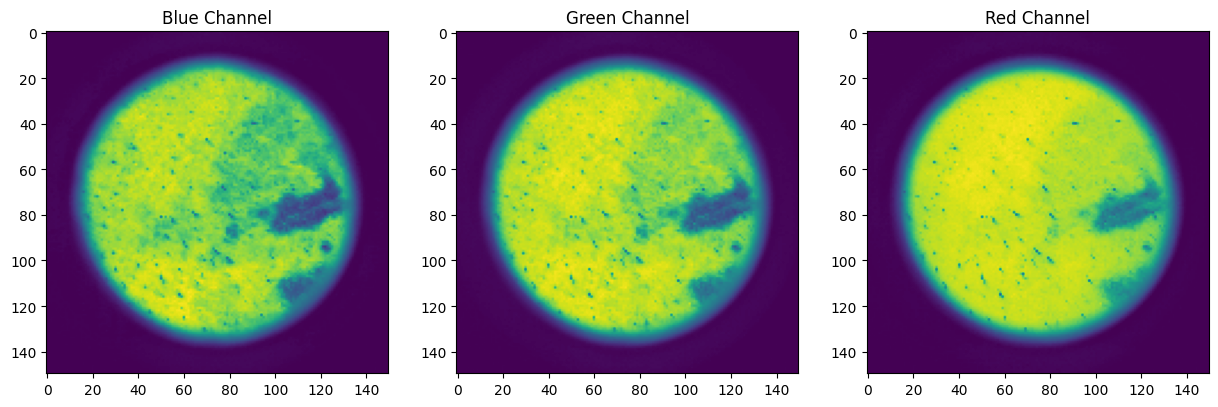

In [81]:
#Splitting into channels
blue,green,red = cv2.split(img)
# Plotting the images
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.imshow(blue)
fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(green)
fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(red)
plt.show()

In [82]:
blue_temp_df = pd.DataFrame(data = blue)
blue_temp_df


,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.003922,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.003922,0.0,0.0,0.0,0.0,0.003922
146,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.003922,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
147,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.003922,0.0,0.0,0.0,0.0,0.000000
148,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.003922,0.0,0.003922,...,0.000000,0.0,0.0,0.0,0.003922,0.0,0.0,0.0,0.0,0.000000


In [83]:

green_temp_df = pd.DataFrame(data = green)
green_temp_df


,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.003922,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.003922,0.0,0.0,0.0,0.0,0.003922
146,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.003922,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
147,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.003922,0.0,0.0,0.0,0.0,0.000000
148,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.003922,0.0,0.003922,...,0.000000,0.0,0.0,0.0,0.003922,0.0,0.0,0.0,0.0,0.000000


In [84]:

red_temp_df = pd.DataFrame(data = red)
red_temp_df

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.003922,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.003922,0.0,0.0,0.0,0.0,0.003922
146,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.003922,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
147,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.003922,0.0,0.0,0.0,0.0,0.000000
148,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.003922,0.0,0.003922,...,0.000000,0.0,0.0,0.0,0.003922,0.0,0.0,0.0,0.0,0.000000


In [85]:
# Train PCA on img

pca_b = PCA(n_components=50)
pca_b.fit(blue_temp_df)
trans_pca_b = pca_b.transform(blue_temp_df)

pca_g = PCA(n_components=50)
pca_g.fit(green_temp_df)
trans_pca_g = pca_g.transform(green_temp_df)

pca_r = PCA(n_components=50)
pca_r.fit(red_temp_df)
trans_pca_r = pca_r.transform(red_temp_df)

In [86]:
print(trans_pca_b.shape)
print(trans_pca_r.shape)
print(trans_pca_g.shape)

(150, 50)
(150, 50)
(150, 50)


In [87]:
print(f"Blue Channel : {sum(pca_b.explained_variance_ratio_)}")
print(f"Green Channel: {sum(pca_g.explained_variance_ratio_)}")
print(f"Red Channel  : {sum(pca_r.explained_variance_ratio_)}")

Blue Channel : 0.9988716117049923
Green Channel: 0.9991101293222929
Red Channel  : 0.9994466520404495


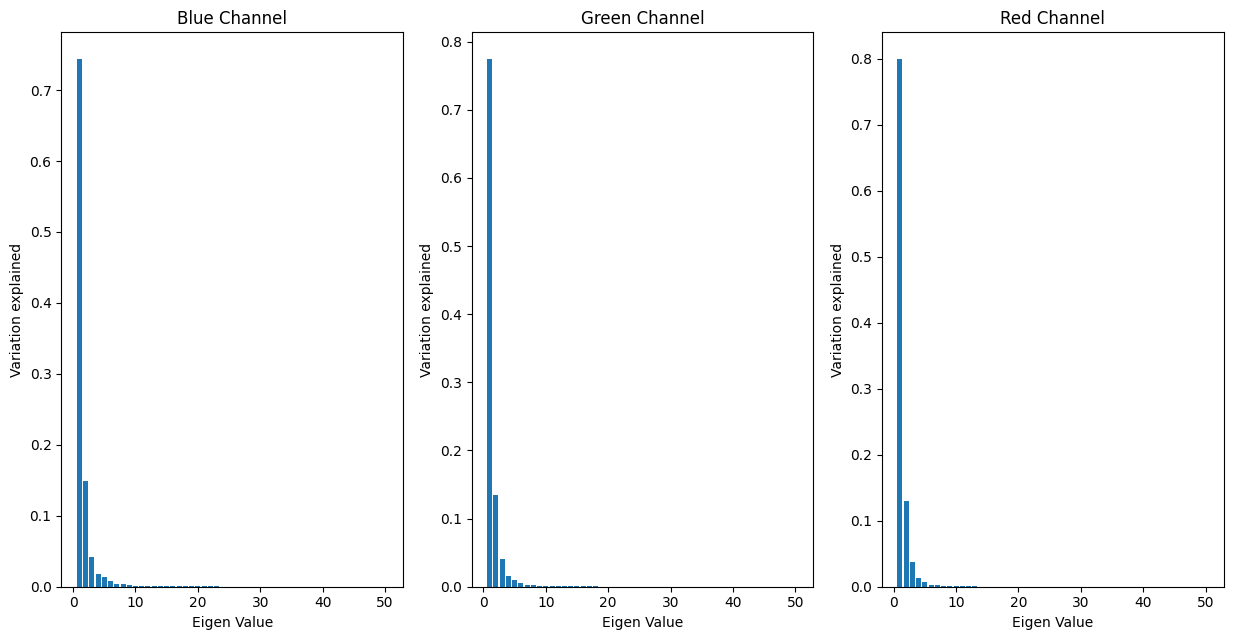

In [88]:
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_b.explained_variance_ratio_)
fig.add_subplot(132)
plt.title("Green Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_g.explained_variance_ratio_)
fig.add_subplot(133)
plt.title("Red Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_r.explained_variance_ratio_)
plt.show()


We can see that we are at max retaining features only till 20 features

In [89]:
b_arr = pca_b.inverse_transform(trans_pca_b)
g_arr = pca_g.inverse_transform(trans_pca_g)
r_arr = pca_r.inverse_transform(trans_pca_r)
print(b_arr.shape, g_arr.shape, r_arr.shape)

(150, 150) (150, 150) (150, 150)


In [90]:
img_reduced= (cv2.merge((b_arr, g_arr, r_arr)))
print(img_reduced.shape)


(150, 150, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


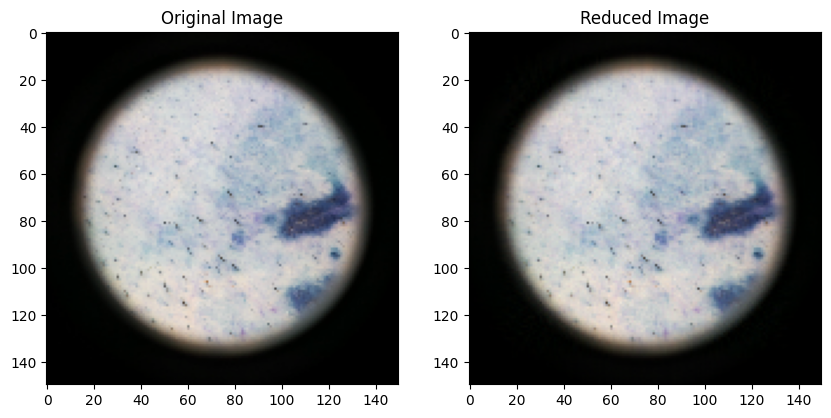

In [91]:
fig = plt.figure(figsize = (10, 7.2)) 
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(img)
fig.add_subplot(122)
plt.title("Reduced Image")
plt.imshow(img_reduced)
plt.show()

In [92]:
# Save our PCA model for all the three channels

import pickle

pickle.dump(pca_b, open('pca_b.pkl', 'wb'))
pickle.dump(pca_g, open('pca_g.pkl', 'wb'))
pickle.dump(pca_r, open('pca_r.pkl', 'wb'))



In [93]:

# Apply saved model on all the images of X_train and Y_train

pca_b = pickle.load(open('pca_b.pkl', 'rb'))
pca_g = pickle.load(open('pca_g.pkl', 'rb'))
pca_r = pickle.load(open('pca_r.pkl', 'rb'))


In [94]:
def split_rgb(img):
    blue,green,red = cv2.split(img)
    return blue,green,red

def apply_pca(blue,green,red):
    # Apply PCA to the image channels (RGB). This will allow us to reduce the dimensionality of our data from 3D -> 1
    blue = pca_b.transform(blue)
    green = pca_g.transform(green)
    red = pca_r.transform(red)
    return blue, green, red

def inverse_pca(blue,green,red):
    # Apply PCA to the image channels (RGB). This will allow us to reduce the dimensionality of our data from 3D -> 1
    blue = pca_b.inverse_transform(blue)
    green = pca_g.inverse_transform(green)
    red = pca_r.inverse_transform(red)
    return blue, green, red

def merge_channels(blue,green,red):
    img_reduced= (cv2.merge((blue, green, red)))
    return img_reduced

def apply_pca_to_all_images(X):
    X_pca = []
    for i in range(len(X)):
        img = X[i]
        blue,green,red = split_rgb(img)
        blue,green,red = apply_pca(blue,green,red)
        img_reduced = merge_channels(blue,green,red)
        X_pca.append(img_reduced)
    return X_pca

def inverse_pca_to_all_images(X):
    X_pca = []
    for i in range(len(X)):
        img = X[i]
        blue,green,red = split_rgb(img)
        blue,green,red = inverse_pca(blue,green,red)
        img_reduced = merge_channels(blue,green,red)
        X_pca.append(img_reduced)
    return X_pca


In [95]:

# Apply PCA on X_train

X_train_pca = apply_pca_to_all_images(X_train)
X_train_pca = np.array(X_train_pca)

X_train_pca.shape
    

(1280, 150, 50, 3)

In [96]:

# Apply PCA on X_test

X_test_pca = apply_pca_to_all_images(X_test)
X_test_pca = np.array(X_test_pca)

X_test_pca.shape

(320, 150, 50, 3)

In [97]:
# Save npy files

np.save('X_train_pca.npy', X_train_pca)
np.save('X_test_pca.npy', X_test_pca)

In [98]:
X_train_pca[10].shape

(150, 50, 3)

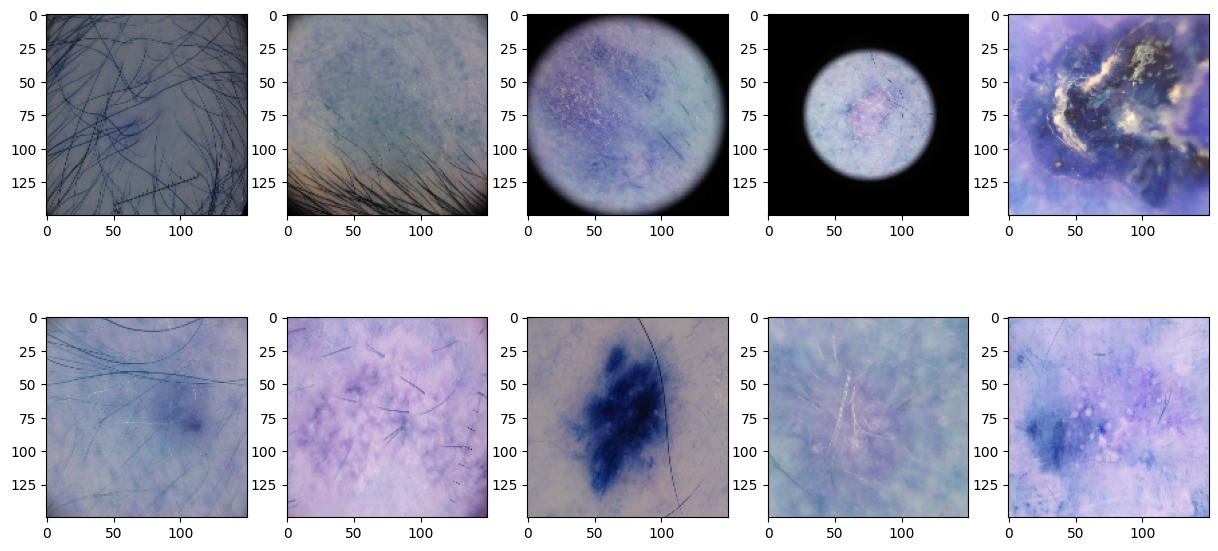

In [103]:
# show a few train images
images= X_train[:10]
fig = plt.figure(figsize = (15, 7.2))
for i in range(10):
    fig.add_subplot(2,5,i+1)
    
    plt.imshow(images[i])
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


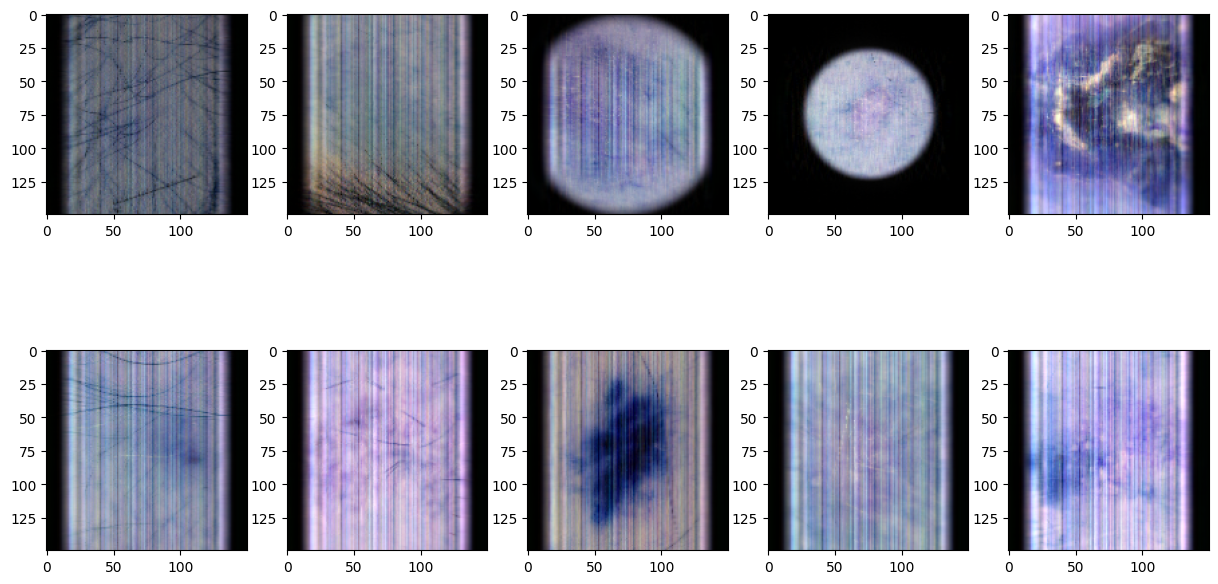

In [105]:

# show a few train images
images= inverse_pca_to_all_images(X_train_pca[:10])
fig = plt.figure(figsize = (15, 8))
for i in range(10):
    fig.add_subplot(2,5,i+1)
    
    plt.imshow(images[i])
plt.show()
